In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [ ]:
pip install tensorflow

In [ ]:
from tensorflow.keras import models, layers, utils, backend as K
import matplotlib.pyplot as plt


In [ ]:
#Importing necessary Libraries
import numpy as np
import tensorflow as tf

In [ ]:
!pip install PyDrive #this is just to make the whole thing on google drive, needed later


In [ ]:
!pip install -q xlrd

In [ ]:
#importing the necessary libraries
import os #operating system
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
download = drive.CreateFile({'id': '1Te-q3_8Na8JImPF2FjyOx3KYtvvyuGkc'}) #downloads the file of the dataset, the ID is obtained from after the following block for the train_LbEl.. zip file
#download = drive.CreateFile({'id': '1Mmpl2Z2IbP5MRmagxP2me89idCpUcBU1'}) #downloads the file of the dataset, the ID is obtained from after the following block for the train_LbEl.. zip file

In [ ]:
download.GetContentFile('Concrete_Data.xls')

In [ ]:
pip install xlrd==1.2.0

     |████████████████████████████████| 103 kB 4.8 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
#df = pd.read_excel('Concrete_Data.xls')
#dt=df.values
d3 = pd.read_excel('Concrete_Data.xls')

In [ ]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [ ]:
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregare", "Age", "CC_Strength"]
curr_col_names = list(d3.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

d3 = d3.rename(columns=mapper)

In [ ]:
# split into input (X) and output (Y) variables
#X = dt[:,0:8]
#Y = dt[:,8]

#Independent variables
X = d3.iloc[:,:-1]
#dependent variable
Y = d3.iloc[:,-1] 

In [ ]:
Y

0       79.986111
1       61.887366
2       40.269535
3       41.052780
4       44.296075
          ...    
1025    44.284354
1026    31.178794
1027    23.696601
1028    32.768036
1029    32.401235
Name: CC_Strength, Length: 1030, dtype: float64

In [ ]:
train_dataset = d3.sample(frac=0.8, random_state=0)
test_dataset = d3.drop(train_dataset.index)

 

In [ ]:
#Independent variables
X = train_dataset.iloc[:,:-1]
#dependent variable
Y = train_dataset.iloc[:,-1] 

#Independent variables
X_test = test_dataset.iloc[:,:-1]
#dependent variable
Y_test = test_dataset.iloc[:,-1]

In [ ]:
d3.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregare,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
Cement,280.270971,104.483845
BlastFurnaceSlag,73.170910,85.865408
FlyAsh,55.317124,64.097588
Water,182.029053,21.288882
Superplasticizer,6.146244,6.000398
CoarseAggregate,973.990789,77.755716
FineAggregare,771.896408,80.030794
Age,45.708738,63.603343
CC_Strength,35.739427,16.582077


In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('CC_Strength')
test_labels = test_features.pop('CC_Strength')

In [ ]:
train_features

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregare,Age
747,500.0,0.00,0.00,200.00,0.00,1125.0,613.0,3
718,122.6,183.90,0.00,203.50,0.00,958.2,800.1,7
175,362.6,189.00,0.00,164.90,11.60,944.7,755.8,91
828,522.0,0.00,0.00,146.00,0.00,896.0,896.0,28
713,157.0,236.00,0.00,192.00,0.00,935.4,781.2,3
...,...,...,...,...,...,...,...,...
673,212.0,141.30,0.00,203.50,0.00,973.4,750.0,7
595,186.2,124.10,0.00,185.70,0.00,1083.4,764.3,28
445,165.0,0.02,143.57,163.81,0.00,1005.6,900.9,56
117,313.3,262.20,0.00,175.50,8.60,1046.9,611.8,28


In [ ]:
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.7.0


In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [ ]:
normalizer.adapt(np.array(train_features))

In [ ]:
print(normalizer.mean.numpy())

[[280.271      73.170906   55.31712   182.02904     6.1462445 973.99084
  771.8964     45.708733 ]]


In [ ]:
######################### Linear reg WITH ONE VARIABLE  
train_features[:1]

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregare,Age
747,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,3


In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[ 500.    0.    0.  200.    0. 1125.  613.    3.]]

Normalized: [[ 2.1  -0.85 -0.86  0.84 -1.02  1.94 -1.99 -0.67]]


In [ ]:

CementT = np.array(train_features['Cement'])

CementT_normalizer = layers.Normalization(input_shape=[1,], axis=None)
CementT_normalizer.adapt(CementT)

In [ ]:
np.size(CementT)
print(0.8*1030)

824.0


In [ ]:
CementT_model = tf.keras.Sequential([
    CementT_normalizer,
    layers.Dense(units=1)
])

CementT_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [ ]:
CementT_model.predict(CementT[:10])

array([[-0.19978054],
       [ 0.1433565 ],
       [-0.07485464],
       [-0.21978322],
       [ 0.11207958],
       [-0.09022035],
       [-0.06885383],
       [ 0.08176642],
       [-0.23614904],
       [-0.05612485]], dtype=float32)

In [ ]:
CementT_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = CementT_model.fit(
    train_features['Cement'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 5.43 s, sys: 325 ms, total: 5.75 s
Wall time: 10.6 s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,11.883019,11.762254,95
96,11.886094,11.734952,96
97,11.877566,11.766208,97
98,11.884183,11.777156,98
99,11.877786,11.764266,99


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 20])
  plt.xlabel('Epoch')
  plt.ylabel('Error [CC_Strength]')
  plt.legend()
  plt.grid(True)

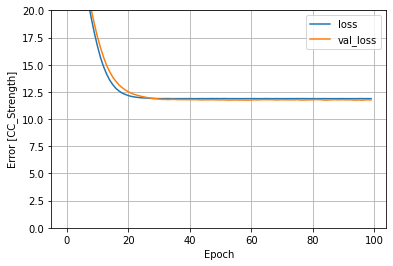

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}

test_results['CementT_model'] = CementT_model.evaluate(
    test_features['Cement'],
    test_labels, verbose=0)

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = CementT_model.predict(x)

In [ ]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Cement'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Cement')
  plt.ylabel('CC_Strength')
  plt.legend()

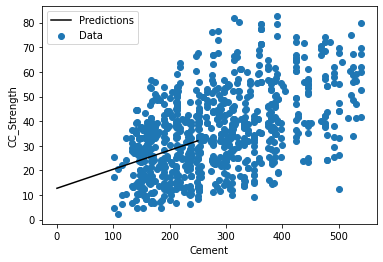

In [ ]:
plot_horsepower(x, y)

In [ ]:
######################### Linear reg WITH MULTIPLE VARIABLE  #########################

In [ ]:
#Build the model 
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [ ]:
linear_model.predict(train_features[:10])

array([[ 2.9550397 ],
       [-3.057479  ],
       [-0.13579199],
       [-1.7405947 ],
       [-3.3411047 ],
       [ 3.0064888 ],
       [ 1.4934067 ],
       [ 1.5025271 ],
       [ 2.1824079 ],
       [ 1.2802031 ]], dtype=float32)

In [ ]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(8, 1) dtype=float32, numpy=
array([[ 0.45101178],
       [-0.50361925],
       [ 0.5751679 ],
       [ 0.06906021],
       [ 0.53134716],
       [ 0.7684965 ],
       [-0.7268863 ],
       [ 0.5625349 ]], dtype=float32)>

In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 5.5 s, sys: 271 ms, total: 5.77 s
Wall time: 10.6 s


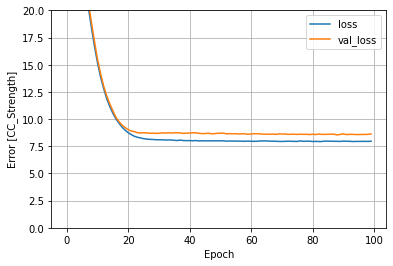

In [ ]:
plot_loss(history)

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [ ]:
##################### Neural network with one layer ############################

In [ ]:

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model


In [ ]:
dnn_cement_model = build_and_compile_model(CementT_normalizer)

In [ ]:
dnn_cement_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [ ]:
%%time
history = dnn_cement_model.fit(
    train_features['Cement'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 6.76 s, sys: 394 ms, total: 7.16 s
Wall time: 6.47 s


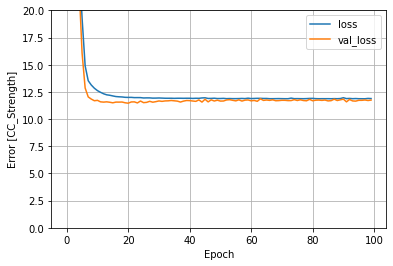

In [ ]:
plot_loss(history)

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = dnn_cement_model.predict(x)
y_pred3 = np.array(dnn_cement_model.predict(test_features['Cement']))


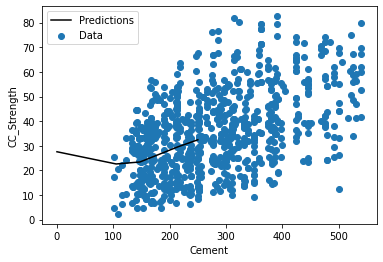

In [ ]:
plot_horsepower(x, y)

In [ ]:
test_results['dnn_cement_model'] = dnn_cement_model.evaluate(
    test_features['Cement'], test_labels,
    verbose=0)

In [ ]:

from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_pred3, test_labels)
#print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_pred3, test_labels)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_pred3, test_labels)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_pred3, test_labels)
print('F1 score: %f' % f1)

ValueError: ignored

In [ ]:
dnn_cement_model.fit(train_features['Cement'], train_labels, validation_data=(test_features['Cement'], test_labels), epochs=100,batch_size=10)

Epoch 1/100
83/83 [==============================] - 1s 6ms/step - loss: 11.8717 - val_loss: 11.9088
Epoch 2/100
83/83 [==============================] - 0s 5ms/step - loss: 11.9193 - val_loss: 11.8845
Epoch 3/100
83/83 [==============================] - 0s 6ms/step - loss: 11.9299 - val_loss: 12.0750
Epoch 4/100
83/83 [==============================] - 0s 5ms/step - loss: 11.8485 - val_loss: 11.9061
Epoch 5/100
83/83 [==============================] - 0s 4ms/step - loss: 11.9343 - val_loss: 11.8784
Epoch 6/100
83/83 [==============================] - 0s 5ms/step - loss: 11.8767 - val_loss: 11.9088
Epoch 7/100
83/83 [==============================] - 0s 4ms/step - loss: 11.8679 - val_loss: 11.9294
Epoch 8/100
83/83 [==============================] - 0s 5ms/step - loss: 11.8763 - val_loss: 11.9373
Epoch 9/100
83/83 [==============================] - 0s 5ms/step - loss: 11.8911 - val_loss: 11.9561
Epoch 10/100
83/83 [==============================] - 0s 4ms/step - loss: 11.8887 - val_los

In [ ]:
y_pred3

11      28.021684
19      42.620648
23      44.207822
25      53.300632
28      37.427515
          ...    
999     15.569747
1003    65.909079
1014    33.306517
1018    37.265488
1021    31.875165
Name: CC_Strength, Length: 206, dtype: float64

In [ ]:
##################### Neural network with multiple  layer ############################

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 8)                17        
 ion)                                                            
                                                                 
 dense_10 (Dense)            (None, 64)                576       
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,818
Trainable params: 4,801
Non-trainable params: 17
_________________________________________________________________


In [ ]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 8.47 s, sys: 395 ms, total: 8.87 s
Wall time: 8.87 s


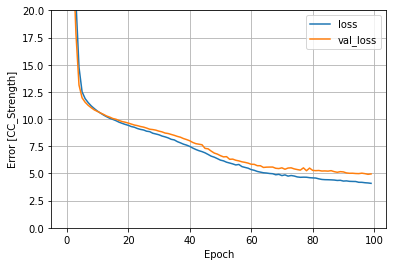

In [ ]:
plot_loss(history)

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
CementT_model,11.846947
linear_model,8.181763
dnn_cement_model,11.872881
dnn_model,4.841266


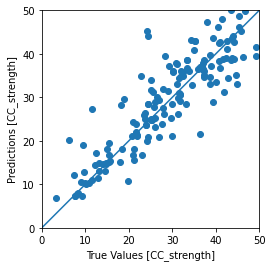

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [CC_strength]')
plt.ylabel('Predictions [CC_strength]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

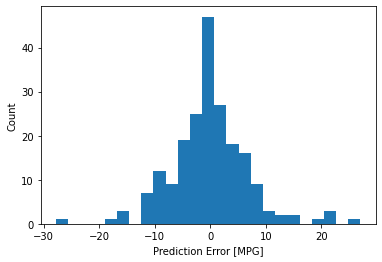

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')